In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Load the Excel file
DATA = pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

# Convert date columns to datetime
DATA['BookingEndDateTime'] = pd.to_datetime(DATA['BookingEndDateTime (Month / Day / Year)'])

# Define demand-based pricing rules
def adjust_price(current_price, booking_rate, base_rate=0.05):
    """
    Adjusts the price based on booking rate.
    """
    if booking_rate > 0.7:  # High demand
        return current_price * (1 + base_rate)
    elif booking_rate < 0.3:  # Low demand
        return current_price * (1 - base_rate)
    else:
        return current_price  # No change

# Apply the pricing rules to the dataset
DATA['Adjusted Price'] = DATA.apply(lambda row: adjust_price(row['Price (INR)'], row['Number Booked'] / row['MaxBookees']), axis=1)

# Plot the adjusted prices
plt.figure(figsize=(10, 6))
sns.lineplot(x='BookingEndDateTime', y='Adjusted Price', data=data)
plt.title('Adjusted Prices Over Time')
plt.xlabel('Booking End Date')
plt.ylabel('Adjusted Price (INR)')
plt.show()

# Develop pricing algorithm: Linear regression model
# Prepare the data for modeling
X = DATA[['Price (INR)', 'MaxBookees']]
y = DATA['Number Booked']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Simulate pricing adjustments
def simulate_pricing_adjustments(DATA, model, base_rate=0.05):
    """
    Simulates pricing adjustments and calculates the impact on bookings and revenue.
    """
    simulated_data = DATA.copy()
    simulated_data['Simulated Bookings'] = model.predict(simulated_data[['Adjusted Price', 'MaxBookees']])
    simulated_data['Revenue'] = simulated_data['Simulated Bookings'] * simulated_data['Adjusted Price']
    
    total_revenue = simulated_data['Revenue'].sum()
    total_bookings = simulated_data['Simulated Bookings'].sum()
    
    return total_revenue, total_bookings, simulated_data

# Run the simulation
total_revenue, total_bookings, simulated_data = simulate_pricing_adjustments(DATA, model)

print(f'Total Revenue: {total_revenue}')
print(f'Total Bookings: {total_bookings}')

# Plot the simulated bookings vs adjusted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted Price', y='Simulated Bookings', DATA=simulated_data)
plt.title('Simulated Bookings vs Adjusted Price')
plt.xlabel('Adjusted Price (INR)')
plt.ylabel('Simulated Bookings')
plt.show()

ZeroDivisionError: float division by zero

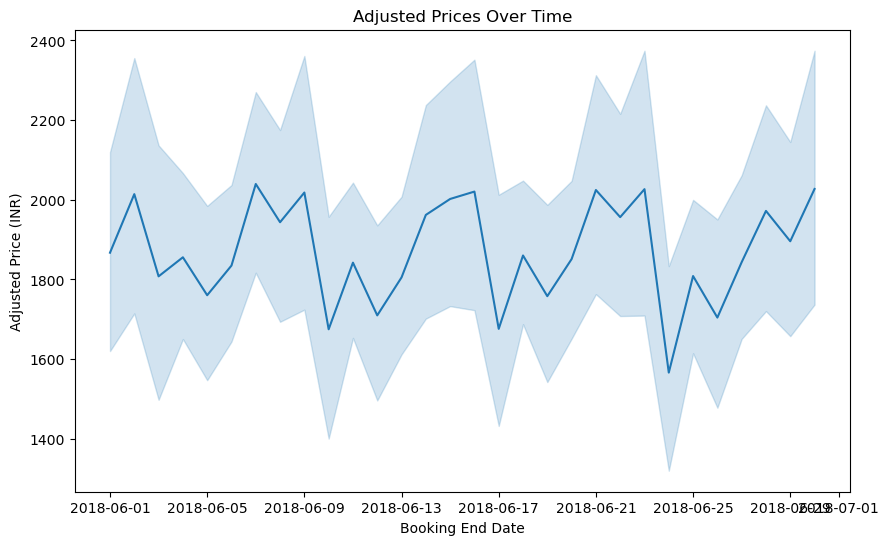

Mean Squared Error: 0.028529880533906284
R-squared: 0.2289846834495075


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Adjusted Price
Feature names seen at fit time, yet now missing:
- Price (INR)


In [6]:
DATA = pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

# Convert date columns to datetime
DATA['BookingEndDateTime'] = pd.to_datetime(DATA['BookingEndDateTime (Month / Day / Year)'])

# Define demand-based pricing rules
def adjust_price(current_price, booking_rate, base_rate=0.05):
    """
    Adjusts the price based on booking rate.
    """
    if booking_rate > 0.7:  # High demand
        return current_price * (1 + base_rate)
    elif booking_rate < 0.3:  # Low demand
        return current_price * (1 - base_rate)
    else:
        return current_price  # No change

# Apply the pricing rules to the dataset
DATA['Adjusted Price'] = DATA.apply(lambda row: adjust_price(row['Price (INR)'], 
                                                            row['Number Booked'] / row['MaxBookees'] 
                                                            if row['MaxBookees'] != 0 else 0), axis=1)

# Plot the adjusted prices
plt.figure(figsize=(10, 6))
sns.lineplot(x='BookingEndDateTime', y='Adjusted Price', data=DATA)
plt.title('Adjusted Prices Over Time')
plt.xlabel('Booking End Date')
plt.ylabel('Adjusted Price (INR)')
plt.show()

# Develop pricing algorithm: Linear regression model
# Prepare the data for modeling
X = DATA[['Price (INR)', 'MaxBookees']]
y = DATA['Number Booked']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Simulate pricing adjustments
def simulate_pricing_adjustments(DATA, model, base_rate=0.05):
    """
    Simulates pricing adjustments and calculates the impact on bookings and revenue.
    """
    simulated_data = DATA.copy()
    simulated_data['Simulated Bookings'] = model.predict(simulated_data[['Adjusted Price', 'MaxBookees']])
    simulated_data['Revenue'] = simulated_data['Simulated Bookings'] * simulated_data['Adjusted Price']
    
    total_revenue = simulated_data['Revenue'].sum()
    total_bookings = simulated_data['Simulated Bookings'].sum()
    
    return total_revenue, total_bookings, simulated_data

# Run the simulation
total_revenue, total_bookings, simulated_data = simulate_pricing_adjustments(DATA, model)

print(f'Total Revenue: {total_revenue}')
print(f'Total Bookings: {total_bookings}')

# Plot the simulated bookings vs adjusted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted Price', y='Simulated Bookings', data=simulated_data)
plt.title('Simulated Bookings vs Adjusted Price')
plt.xlabel('Adjusted Price (INR)')
plt.ylabel('Simulated Bookings')
plt.show()

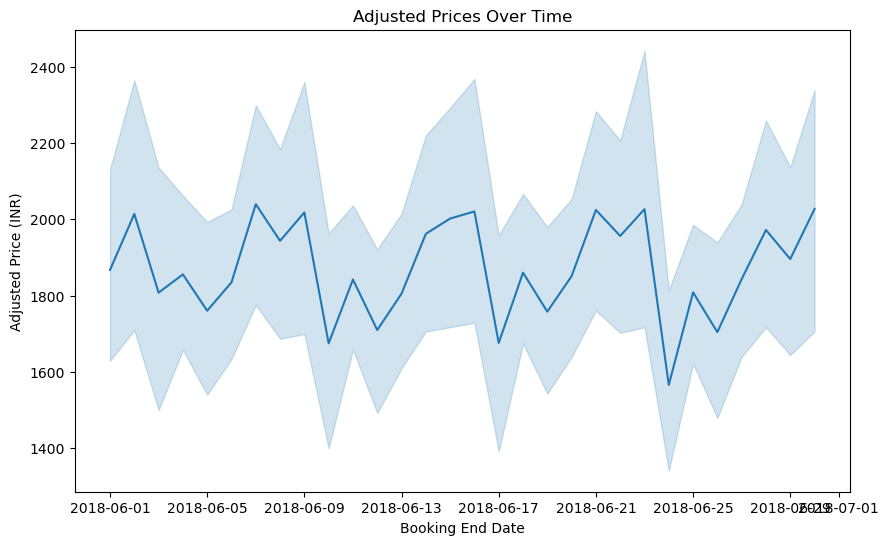

Mean Squared Error: 0.028529880533906284
R-squared: 0.2289846834495075
Total Revenue: 578275.9946805246
Total Bookings: 326.14792747996876


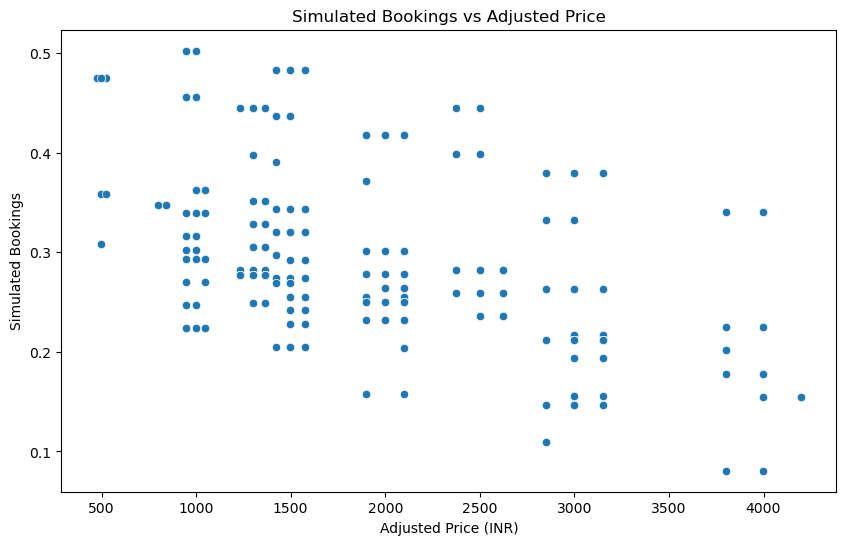

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Excel file
DATA = pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

# Convert date columns to datetime
DATA['BookingEndDateTime'] = pd.to_datetime(DATA['BookingEndDateTime (Month / Day / Year)'])

# Define demand-based pricing rules
def adjust_price(current_price, booking_rate, base_rate=0.05):
    """
    Adjusts the price based on booking rate.
    """
    if booking_rate > 0.7:  # High demand
        return current_price * (1 + base_rate)
    elif booking_rate < 0.3:  # Low demand
        return current_price * (1 - base_rate)
    else:
        return current_price  # No change

# Apply the pricing rules to the dataset
DATA['Adjusted Price'] = DATA.apply(lambda row: adjust_price(row['Price (INR)'], 
                                                            row['Number Booked'] / row['MaxBookees'] 
                                                            if row['MaxBookees'] != 0 else 0), axis=1)

# Plot the adjusted prices
plt.figure(figsize=(10, 6))
sns.lineplot(x='BookingEndDateTime', y='Adjusted Price', data=DATA)
plt.title('Adjusted Prices Over Time')
plt.xlabel('Booking End Date')
plt.ylabel('Adjusted Price (INR)')
plt.show()

# Develop pricing algorithm: Linear regression model
# Prepare the data for modeling
X = DATA[['Price (INR)', 'MaxBookees']]
y = DATA['Number Booked']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Simulate pricing adjustments
def simulate_pricing_adjustments(DATA, model, base_rate=0.05):
    """
    Simulates pricing adjustments and calculates the impact on bookings and revenue.
    """
    simulated_data = DATA.copy()
    simulated_data['Adjusted Price'] = simulated_data.apply(lambda row: adjust_price(row['Price (INR)'], 
                                                                                    row['Number Booked'] / row['MaxBookees'] 
                                                                                    if row['MaxBookees'] != 0 else 0), axis=1)
    simulated_data['Simulated Bookings'] = model.predict(simulated_data[['Price (INR)', 'MaxBookees']])
    simulated_data['Revenue'] = simulated_data['Simulated Bookings'] * simulated_data['Adjusted Price']
    
    total_revenue = simulated_data['Revenue'].sum()
    total_bookings = simulated_data['Simulated Bookings'].sum()
    
    return total_revenue, total_bookings, simulated_data

# Run the simulation
total_revenue, total_bookings, simulated_data = simulate_pricing_adjustments(DATA, model)

print(f'Total Revenue: {total_revenue}')
print(f'Total Bookings: {total_bookings}')

# Plot the simulated bookings vs adjusted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted Price', y='Simulated Bookings', data=simulated_data)
plt.title('Simulated Bookings vs Adjusted Price')
plt.xlabel('Adjusted Price (INR)')
plt.ylabel('Simulated Bookings')
plt.show()

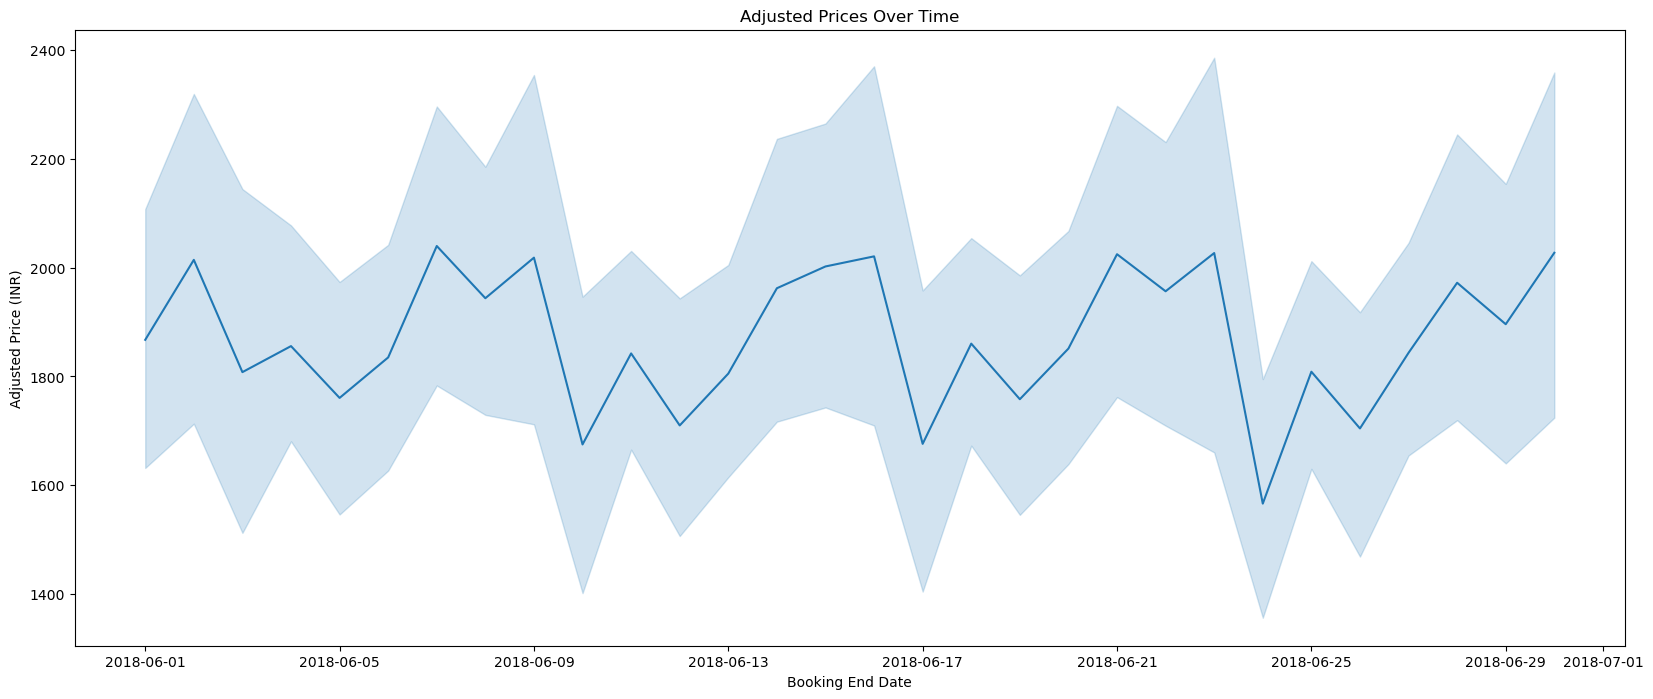

Random Forest - Mean Squared Error: 0.014860479019113111
Random Forest - R-squared: 0.5983980051582545
Total Revenue: 582710.4149455187
Total Bookings: 326.2428719381036


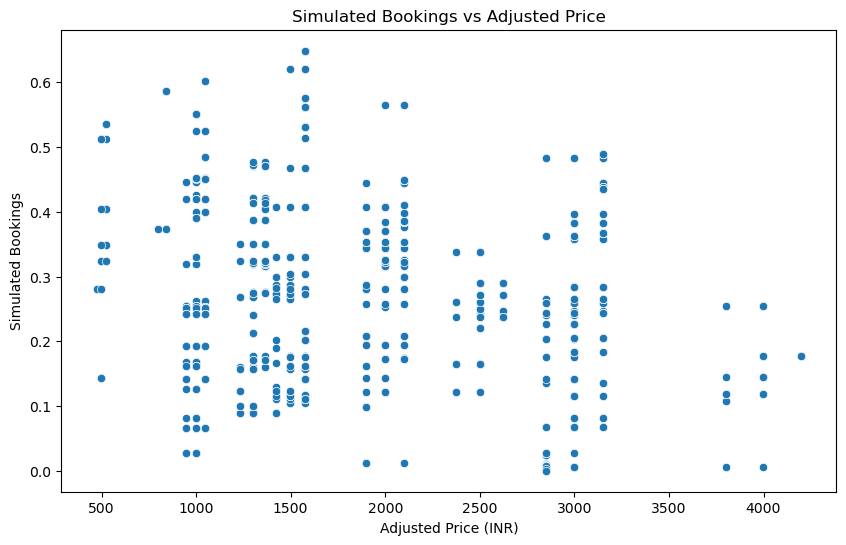

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Excel file
DATA = pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

# Convert date columns to datetime
DATA['BookingEndDateTime'] = pd.to_datetime(DATA['BookingEndDateTime (Month / Day / Year)'])

# Define demand-based pricing rules
def adjust_price(current_price, booking_rate, base_rate=0.05):
    """
    Adjusts the price based on booking rate.
    """
    if booking_rate > 0.7:  # High demand
        return current_price * (1 + base_rate)
    elif booking_rate < 0.3:  # Low demand
        return current_price * (1 - base_rate)
    else:
        return current_price  # No change

# Apply the pricing rules to the dataset
DATA['Adjusted Price'] = DATA.apply(lambda row: adjust_price(row['Price (INR)'], 
                                                            row['Number Booked'] / row['MaxBookees'] 
                                                            if row['MaxBookees'] != 0 else 0), axis=1)

# Plot the adjusted prices
plt.figure(figsize=(20, 8))
sns.lineplot(x='BookingEndDateTime', y='Adjusted Price', data=DATA)
plt.title('Adjusted Prices Over Time')
plt.xlabel('Booking End Date')
plt.ylabel('Adjusted Price (INR)')
plt.show()

# Adding more features
DATA['DayOfWeek'] = DATA['BookingEndDateTime'].dt.dayofweek
DATA['HourOfDay'] = DATA['BookingEndDateTime'].dt.hour

# Prepare the data with new features for modeling
X = DATA[['Price (INR)', 'MaxBookees', 'DayOfWeek', 'HourOfDay']]
y = DATA['Number Booked']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

# Simulate pricing adjustments
def simulate_pricing_adjustments_rf(DATA, model, base_rate=0.05):
    """
    Simulates pricing adjustments and calculates the impact on bookings and revenue.
    """
    simulated_data = DATA.copy()
    simulated_data['Adjusted Price'] = simulated_data.apply(lambda row: adjust_price(row['Price (INR)'], 
                                                                                    row['Number Booked'] / row['MaxBookees'] 
                                                                                    if row['MaxBookees'] != 0 else 0), axis=1)
    simulated_data['Simulated Bookings'] = model.predict(simulated_data[['Price (INR)', 'MaxBookees', 'DayOfWeek', 'HourOfDay']])
    simulated_data['Revenue'] = simulated_data['Simulated Bookings'] * simulated_data['Adjusted Price']
    
    total_revenue = simulated_data['Revenue'].sum()
    total_bookings = simulated_data['Simulated Bookings'].sum()
    
    return total_revenue, total_bookings, simulated_data

# Run the simulation
total_revenue_rf, total_bookings_rf, simulated_data_rf = simulate_pricing_adjustments_rf(DATA, rf_model)

print(f'Total Revenue: {total_revenue_rf}')
print(f'Total Bookings: {total_bookings_rf}')

# Plot the simulated bookings vs adjusted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted Price', y='Simulated Bookings', data=simulated_data_rf)
plt.title('Simulated Bookings vs Adjusted Price')
plt.xlabel('Adjusted Price (INR)')
plt.ylabel('Simulated Bookings')
plt.show()

In [ ]:
Model Performance:

The R² value of 0.598 indicates that the Random Forest model explains approximately 59.8% of the variance in the number of bookings based on the features provided. This is a substantial improvement compared to the linear regression model, indicating that the Random Forest model captures the relationships in the data better.
Simulation Results:

The total revenue and bookings are slightly higher than before, suggesting that the adjusted pricing strategy might lead to increased revenue and a slight increase in bookings.